# Part 1

## 1.1 Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import display, Markdown

In [2]:
import scienceplots
plt.style.use(['default'])
plt.style.use(['science', 'no-latex'])

In [3]:
def generate_sin_data(sigma, N):
    """
    Function to generate X data from a uniform distribution and corresponding y data with normal errors.

    Parameters
    ----------
    sigma : float 
        standard deviation of normal errors
    N : int
        number of data points

    Returns
    -------
    X : ndarray
        input data
    y : ndarray
        corresponding output data with normal error term

    """
    X = np.random.uniform(0,1,N) 
    y = np.sin(2*np.pi*X)**2 + np.random.normal(0,sigma,N)
    return X, y

In [4]:
def poly_feature_space(X, k):
    """
    Function to create the polynomial feature space.
    The function loops through all x applying polynomial basis of order to each data point.
    The matrix rows correpsond to the ith data point.
    The matrix columns correspond to the jth polynomial basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        dimensions of polynomial basis

    Returns
    -------
    phi : ndarray
        polynomial feature space of dimensions {len(X), k}

    """
    # feature space matrix of dimension {len(X),k}
    phi = np.stack([X**i for i in range(k)], axis=1)
    return phi

In [5]:
def optimal_weights(phi, y):
    """
    Function to obtain the optimal weights.
    The function performs the matrix operation (phi^T*phi)^-1*phi^T*y and returns the result.

    Parameters
    ----------
    phi : ndarray
        feature space
    y : ndarray
        output data of dimensions {1, n}

    Returns
    -------
    Array of optimal weights: ndarray

    """
    # linearly independent rows so need right inverse
    # utilise numpys built-in pseduo-inverse function to complete matrix operation 
    return phi.T@np.linalg.pinv(phi@phi.T)@y

In [6]:
def eval_poly(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : ndarray
        optimal weights
    X : ndarray
        input data

    Returns
    -------
    Array of fitted y values: ndarray

    """
    # list comprehension creating an array of predicted values using optimised weights to scale polynomial elements 
    return np.squeeze(poly_feature_space(X, w.size) @ w)

In [7]:
def sin_feature_space(X, k):
    """
    Function to create the sine feature space.
    The function loops through all x applying sine basis of order k to each data point.
    The matrix rows correspond to the ith data point.
    The matrix columns correspond to the jth order sine basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        dimensions of sine basis

    Returns
    -------
    phi : ndarray
        sine feature space of dimensions {len(X), k}

    """
    # feature space matrix
    phi = np.stack([np.sin(i*np.pi*X) for i in range(1, k+1)], axis=1)
    return phi

In [8]:
def eval_sin(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : optimal weights
    X : X data

    Returns
    -------
    Vector of fitted y values

    """
    # create an array of predicted values using optimised weights to scale sine elements 
    return np.squeeze(sin_feature_space(X, w.size) @ w)

In [9]:
def linear_regression(X, y, k, feature_space):
    """
    Function to build a feature space and find the optimal weights of each basis.

    Parameters
    ----------
    X : ndarray
        X data
    y : ndarray
        y data
    k : int
        dimension of feature space basis function
    feature_space : Callable
        function to create feature space

    Returns
    -------
    phi : ndarray
        populated feature space
    w : ndarray
        populated weights vector

    """
    # use functions defined above to generate feature space and weights array
    phi = feature_space(X, k)
    w = optimal_weights(phi, y)
    return phi, w

### 1a.

In [10]:
# create arrays of sample data provided
X = np.array([1, 2, 3, 4])
y = np.array([3, 2, 0, 5])

In [11]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,5,1000)

In [12]:
# intitialise empty weights store
weights_list1 = []

In [13]:
# intitialise empty mse dictionary; key correspsonding to each basis function
mse_dict = {'Basis 1': None, 'Basis 2': None, 'Basis 3': None, 'Basis 4': None}

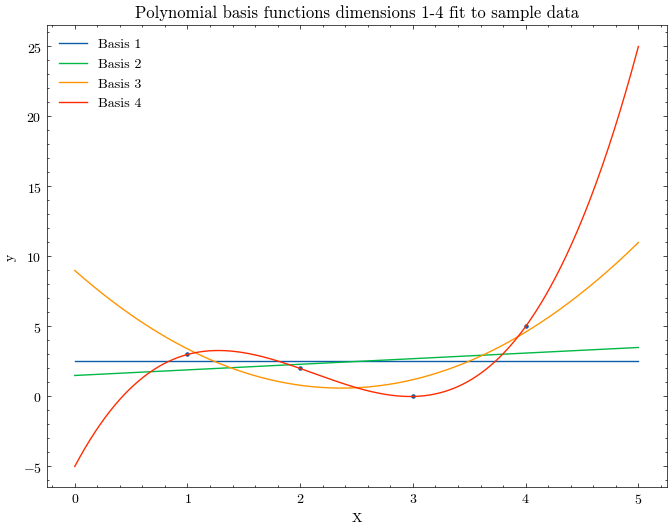

In [14]:
plt.figure(figsize=(8,6))

# loop through range 1-4 to generate feature space and optimal weights for each basis vector of dims 1-4
# {1}, {1, x}, {1, x, x^2}, {1, x, x^2, x^3}
for k in range(1, 5):
    
    # build feature space and find weights; append to list to store
    phi, w = linear_regression(X, y, k, poly_feature_space)
    weights_list1.append(w)
    
    # calculate fitted y values from the sample X data
    pred_sample = eval_poly(w, X)
    
    # calculate mse and add to corresponding dictionary key
    mse_dict["Basis "+str(k)] = np.average((y-pred_sample)**2)
    
    # calculate predicted y values for 'all' x using optimised weights
    pred = eval_poly(w, x_axis)
    plt.plot(x_axis, pred, label="Basis "+str(k))
    
# show plot of four curves overlaying sample data 
plt.scatter(X, y, s=5)
plt.legend()
plt.title("Polynomial basis functions dimensions 1-4 fit to sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("assets/q1a_plot.png")
plt.show()

### 1b. Equations of fitted basis functions

In [15]:
for weights in weights_list1:
    print(np.round(weights, 2).tolist())

[2.5]
[1.5, 0.4]
[9.0, -7.1, 1.5]
[-5.0, 15.17, -8.5, 1.33]


\begin{alignat*}{2}
    &\{1\}:\quad &&y=2.5 \\
    &\{1, x\}:\quad &&y=1.5+0.4x \\
    &\{1, x, x^2\}:\quad &&y=9-7.1x+1.5x^2 \\
    &\{1, x, x^2, x^3\}:\quad &&y=-5+15.17x-8.5x^2+1.33x^3
\end{alignat*}

### 1c.

In [16]:
# convert mse dictionary to dataframe and show
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns=['MSE'])
mse_df

,MSE
Basis 1,3.250000e+00
Basis 2,3.050000e+00
Basis 3,8.000000e-01
Basis 4,2.317719e-21


### 2ai.

In [73]:
# generate 30 random data points using given sigma
sigma = 0.07
X_sample, y_sample = generate_sin_data(sigma, 30)

In [74]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,1,1000)
y_true = np.sin(2*np.pi*x_axis)**2 

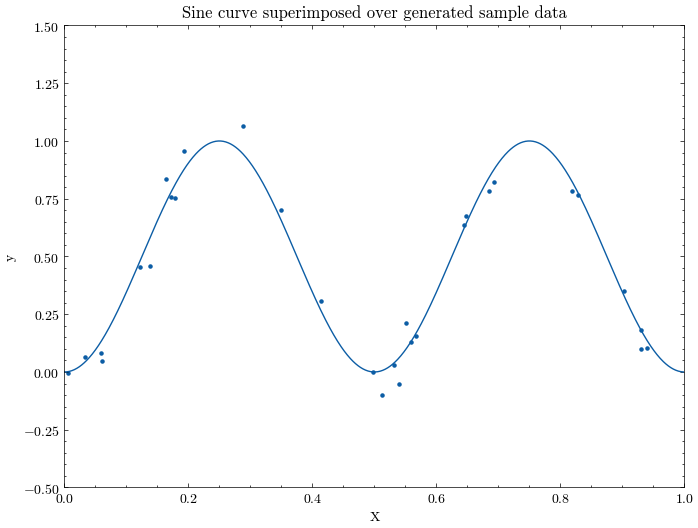

In [75]:
# plot full curve with sample overlay
plt.figure(figsize=(8,6))
plt.scatter(X_sample, y_sample, s=5)
plt.title("Sine curve superimposed over generated sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(x_axis, y_true)
plt.ylim(-0.5,1.5)
plt.xlim(0,1)
plt.savefig("assets/q2ai_sine-data.png")
plt.show()

### 2aii.

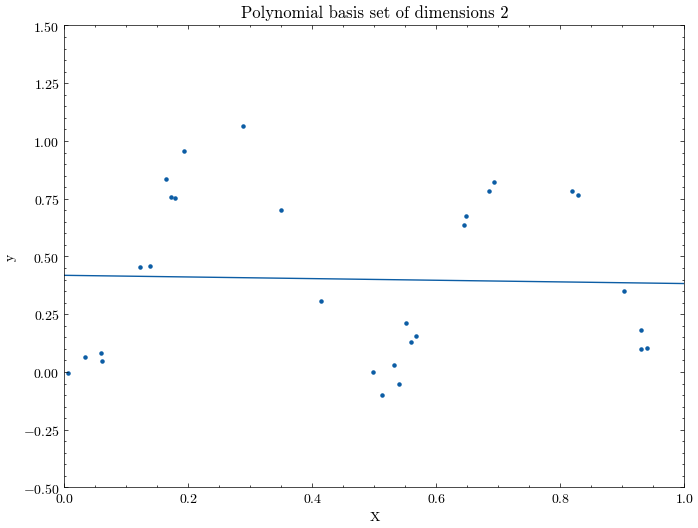

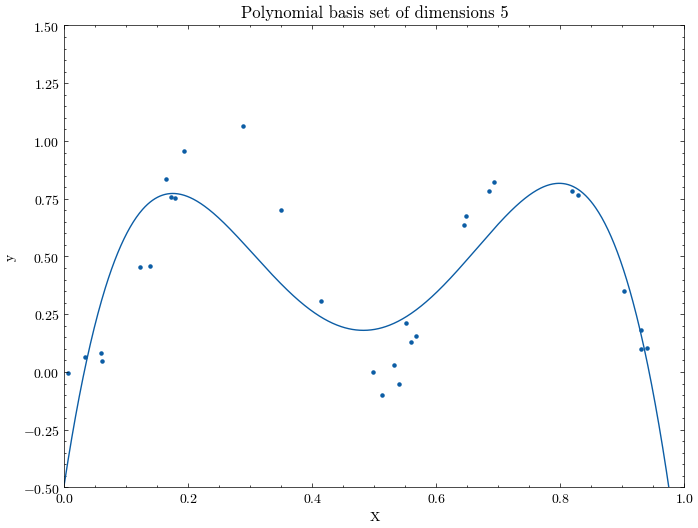

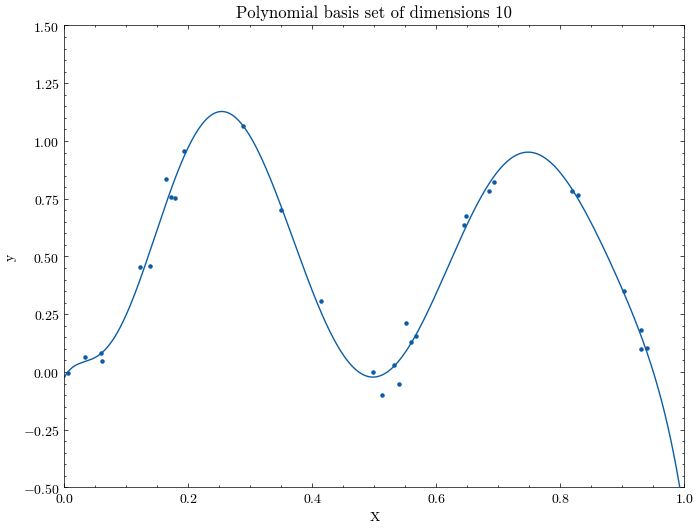

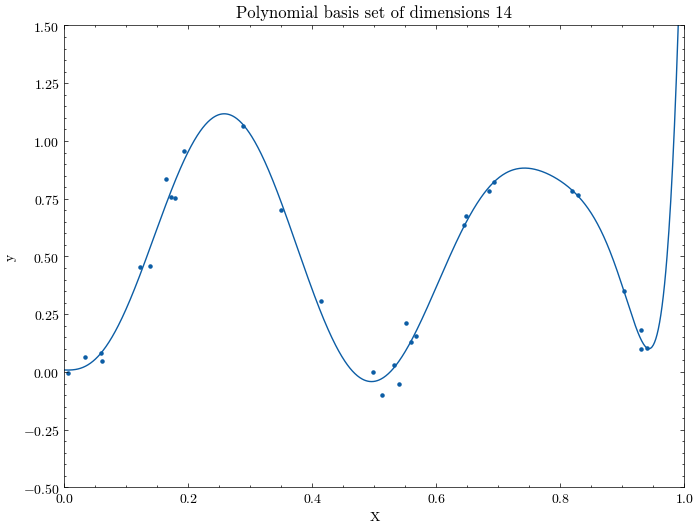

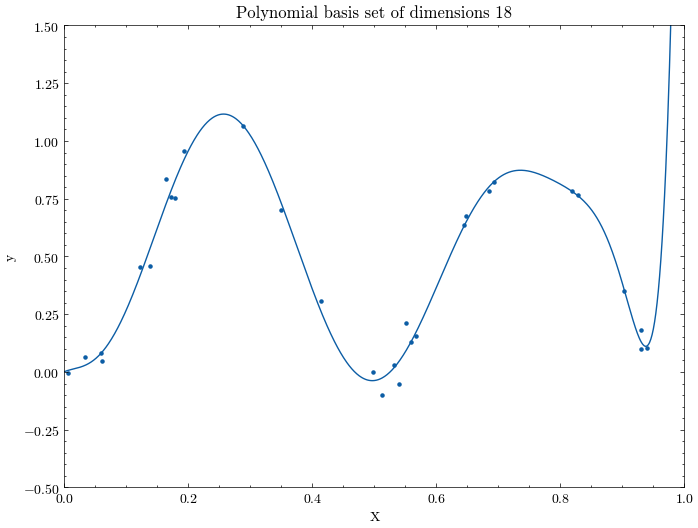

In [76]:
# perform linear regression for basis functions of dimensions 2, 5, 10, 14, and 18
dims = [2, 5, 10, 14, 18]
for k in dims:
    
    # build feature space of dimensions {len(X_sample), dims[k]} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, k, poly_feature_space)
    
    # use weights to make predictions
    pred = eval_poly(w, x_axis)
    
    # plot sample data points with fitted polynomial basis overlay
    plt.figure(figsize=(8,6))
    plt.title(f"Polynomial basis set of dimensions {k}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(x_axis, pred)
    plt.scatter(X_sample, y_sample, s=5)
    plt.ylim(-0.5,1.5)
    plt.xlim(0,1)
    plt.savefig(f"q2aii_basis-{k}.png")
    plt.show()

### 2b.

In [77]:
# initialise empty lists to store weight vectors for 2b
weights_list3 = []

In [78]:
# initialise empty mse list for sample data 
poly_mse_sample = []

# repeat process in 2a. for all polynomial feature spaces of dimensions 1-18
dims18 = np.arange(1,19)
for k in dims18:

    # build feature space of dimensions {len(X_sample), k} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, k, poly_feature_space)
    weights_list3.append(w)
    
    # use weights to make predictions and determine mse
    poly_pred_sample = eval_poly(w, X_sample)
    poly_mse_sample.append(np.average((y_sample-poly_pred_sample)**2))

In [79]:
# calculate log mse for each basis
log_poly_mse_sample = np.log(poly_mse_sample)

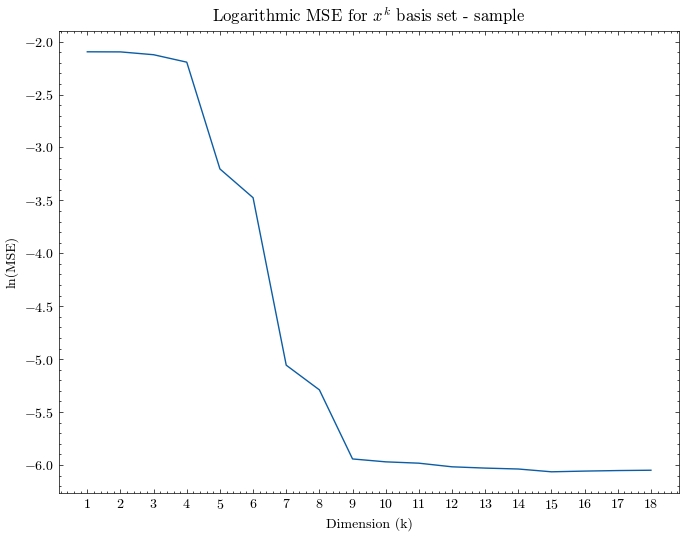

In [80]:
# plot the log mse against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for "r"$x^k$"" basis set - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, log_poly_mse_sample)
plt.savefig("assets/q2b_poly-lnmse-sample.png")
plt.show()

### 2c.

In [81]:
# generate 1000 unseen test data points
X_test, y_test = generate_sin_data(sigma, 1000)

In [82]:
# initialise empty mse list for test data
poly_mse_test = []

# perform linear regression on generated X test data using weights calculated in 2b. 
# repeat for all polynomial fits up to dims 18 and calculate the mse using generated y test data
for w in weights_list3: 
    poly_pred_test = eval_poly(w, X_test)
    poly_mse_test.append(np.average((y_test-poly_pred_test)**2))

In [83]:
# calculate log mse for test data
log_poly_mse_test = np.log(poly_mse_test)

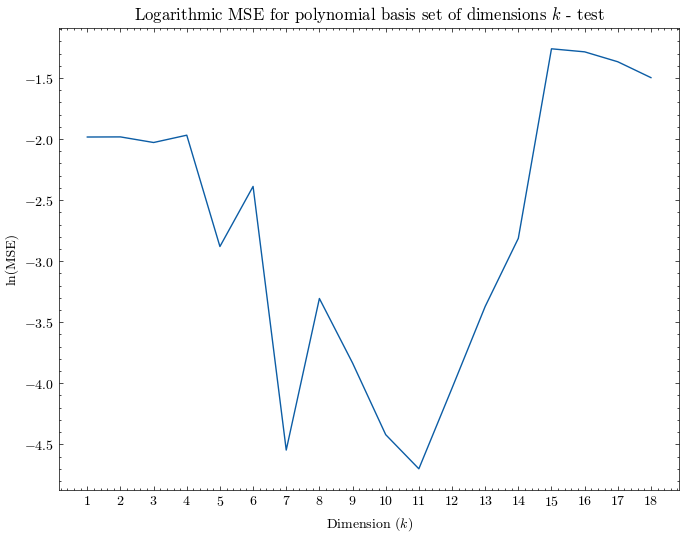

In [84]:
# plot log mse from the test data against dimension of basis function used 
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for polynomial basis set of dimensions "r"$k$"" - test")
plt.xlabel("Dimension ("r"$k$"")")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, log_poly_mse_test)
plt.savefig("assets/q2c_poly-lnmse-test.png")
plt.show()

### 2d.

In [85]:
# initialise empty matrix of dimensions {100, 18} to store mse values of 18 basis functions over 100 runs 
poly_mse_train_all = np.zeros([100, 18])
poly_mse_test_all = np.zeros([100, 18])

# perform 100 runs of linear regression using polynomial feature spaces with basis functions order 0-17
runs = 100
for r in tqdm(range(runs)):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for order in range(0,18): 
        
        # build feature space of dimensions {len(X_train), order+1} and find weights array {order+1, 1}
        phi, w = linear_regression(X_train, y_train, order+1, poly_feature_space)
        
        # make predictions and record mse for train and test
        poly_pred_train = eval_poly(w, X_train)
        poly_mse_train_all[r,order] = np.average((y_train-poly_pred_train)**2)

        poly_pred_test = eval_poly(w, X_test)
        poly_mse_test_all[r,order] = np.average((y_test-poly_pred_test)**2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [86]:
# calculate the log average mse over 100 runs 
logavg_poly_mse_train = np.log(np.average(poly_mse_train_all, axis=0))
logavg_poly_mse_test = np.log(np.average(poly_mse_test_all, axis=0))

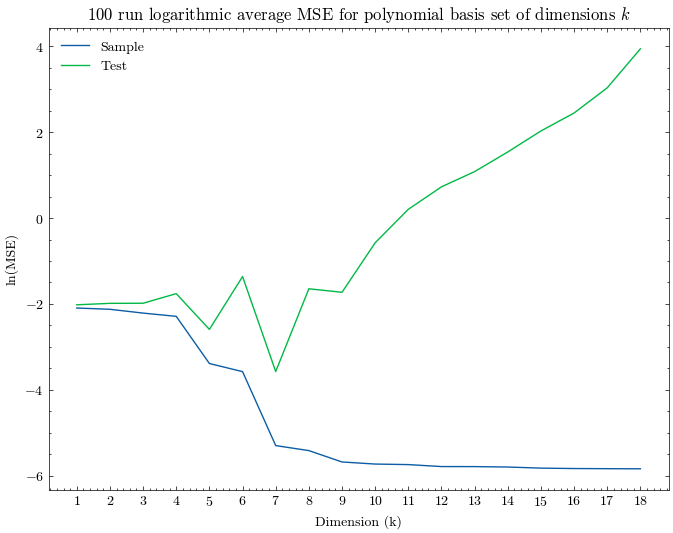

In [87]:
# plot the log average mse for train and test against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("100 run logarithmic average MSE for polynomial basis set of dimensions "r"$k$")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, logavg_poly_mse_train, label='Sample') 
plt.plot(dims18, logavg_poly_mse_test, label='Test') 
plt.legend()
plt.savefig("assets/q2d_poly-lnmse-100.png")
plt.show()

### 3.

In [88]:
# intialise empty feature space and weight lists for sine basis
sin_weights_list = []

# intialise list to store sine mse results
sin_mse_sample = []

# fit linear regression using sine basis functions up to dimension 18
dims18 = np.arange(1,19)
for k in dims18:
    
    # build feature space of dimensions {len(X_sample), k} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, k, sin_feature_space)
    sin_weights_list.append(w)
    
    # make predictions using optimal weights and record mse
    sin_pred_sample = eval_sin(w, X_sample)
    sin_mse_sample.append(np.average((y_sample-sin_pred_sample)**2))

In [89]:
# calculate log of mse results    
log_sin_mse_sample = np.log(sin_mse_sample)

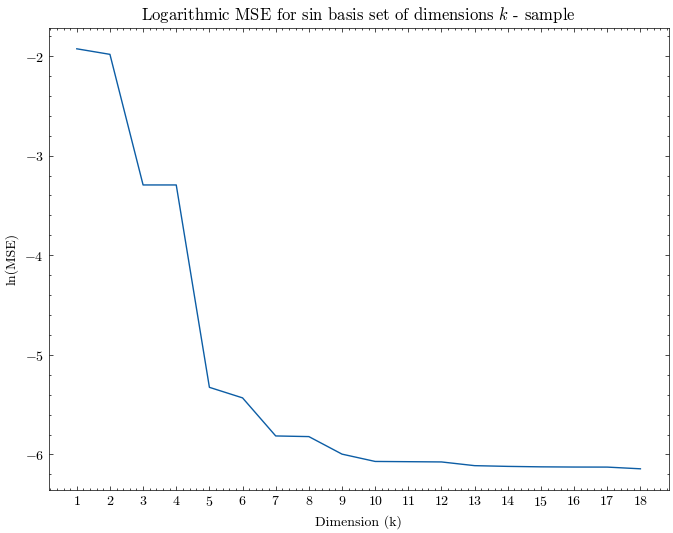

In [90]:
# plot log average mse for sample against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for sin basis set of dimensions "r"$k$"" - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, log_sin_mse_sample)
plt.savefig("assets/q3_sin-lnmse-sample.png")
plt.show()

In [91]:
# initliase list to store test mse results for sine basis
sin_mse_test = []

# apply linear regression to test data and append mse results to list 
for w in sin_weights_list: 
    sin_pred_test = eval_sin(w, X_test)
    sin_mse_test.append(np.average((y_test-sin_pred_test)**2))

In [92]:
# calculate log of test mse results    
log_sin_mse_test = np.log(sin_mse_test)

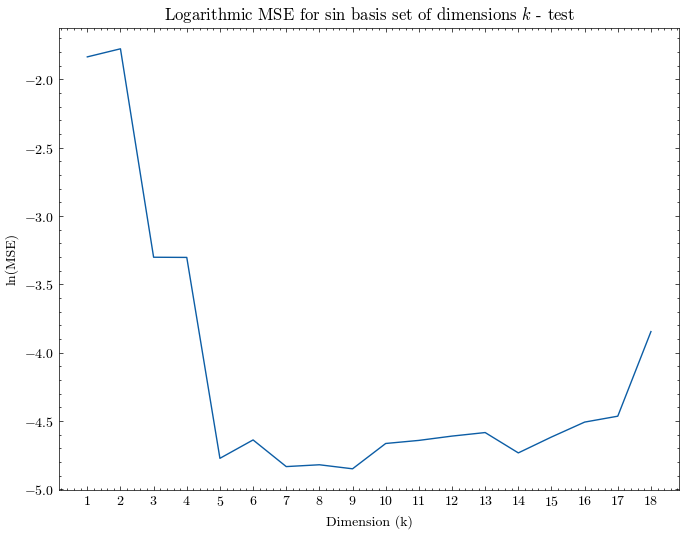

In [93]:
# plot the log average mse for test against dimension of sine basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for sin basis set of dimensions "r"$k$"" - test")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, log_sin_mse_test)
plt.savefig("assets/q3_sin-lnmse-test.png")
plt.show()

In [94]:
# initliase matrices to store mse results for 18 basis functions over 100 runs 
sin_mse_sample_all = np.zeros([100,18])
sin_mse_test_all = np.zeros([100,18])

# repeat linear regression process for randomly sampled train/test data over 100 runs
runs = 100
for r in tqdm(range(runs)):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for order in range(0,18): 
        
        # build feature space of dimensions {len(X_sample), order+1} and find weights array {order+1, 1}
        phi, w = linear_regression(X_sample, y_sample, order+1, sin_feature_space)
        
        # make predictions and record mse
        sin_pred_sample = eval_sin(w, X_sample)
        sin_mse_sample_all[r,order] = np.average((y_sample-sin_pred_sample)**2)

        sin_pred_test = eval_sin(w, X_test)
        sin_mse_test_all[r,order] = np.average((y_test-sin_pred_test)**2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [95]:
# calculate the log of the 100 run average mse for each basis  
logavg_sin_mse_sample = np.log(np.average(sin_mse_sample_all, axis=0))
logavg_sin_mse_test = np.log(np.average(sin_mse_test_all, axis=0))

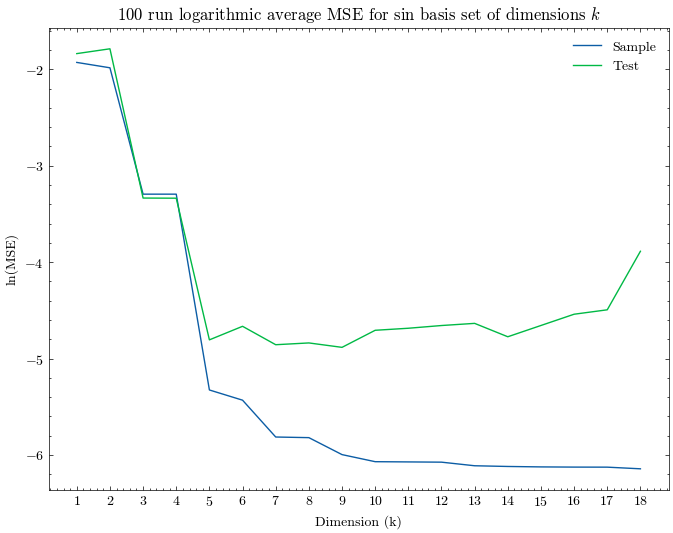

In [96]:
# plot the log average mse for train and test against dimension of sine basis function used
plt.figure(figsize=(8,6))
plt.title("100 run logarithmic average MSE for sin basis set of dimensions "r"$k$""")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.xticks(np.arange(1,19,1))
plt.plot(dims18, logavg_sin_mse_sample, label='Sample') 
plt.plot(dims18, logavg_sin_mse_test, label='Test') 
plt.legend()
plt.savefig("assets/q3_sin-lnmse-100.png")
plt.show()

## 1.2 Filtered Boston Housing and Kernels

### 4a.

In [41]:
# import module to perform train/test splits
from sklearn.model_selection import train_test_split

In [42]:
# read in data and split input/output data
data = pd.read_csv("boston_housing.csv")
X = data.drop(columns='MEDV').to_numpy()
y = data['MEDV'].to_numpy()
y = y.reshape([len(y),1])

In [43]:
# initialise empty dictionary to store average mse (and standard deviation) for train and test
lr_results_dict = {}

In [44]:
# random split of train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3) 

In [45]:
def naive_reg(X_train, X_test, y_train, y_test):
    """
    Function that completes naive linear regression.

    Parameters
    ----------
    X_train : ndarray
        array of train inputs
    X_test : ndarray
        array of test inputs
    y_train : ndarray
        array of train outputs
    y_test: ndarray
        array of test outputs

    Returns
    -------
    mse_train: float
        mse on train predicitons
    mse_test: float
        mse on test predictions
    """

    # produce array of ones matching the length of the train/test splits
    ones_train = np.ones([len(X_train), 1])
    ones_test = np.ones([len(X_test), 1])
    
    # find optimal weights for regression using the vector of ones as the feature space
    w = optimal_weights(ones_train, y_train)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
    pred_train_const = ones_train@w
    pred_test_const = ones_test@w
    
    # calculate mse for train and test data
    mse_train = np.average((y_train-pred_train_const)**2)
    mse_test = np.average((y_test-pred_test_const)**2)
    
    return mse_train, mse_test

In [46]:
mse_train_const, mse_test_const = naive_reg(X_train, X_test, y_train, y_test)
lr_results_dict[f"Naive Regression"] = {'Train': str(mse_train_const),'Test': str(mse_test_const)}

### 4b.

The constant function derived in naive regression represents the arithmetic mean of the y-values employed during the regression analysis. This outcome is readily evident through the matrix computation which computes a pseudo-inverse followed by the scalar product between the result and y values. 

The inner product enclosed within the inversion operation transpires between a $n\times 1$ column vector composed of ones and an $1\times n$ row vector also composed of ones, culminating in a $n\times n$ matrix occupied by ones. This value is subsequently subjected to a pseudo-inversion and the scalar product between a row vector of ones and the result of the inversion computed, yielding a row vector of length $n$, with each element equivalent to $\frac{1}{n}$. 

The dot product involving this row vector and the column vector of y-values results in the summation $\sum^n_{i=1}{\frac{1}{n}y_i}=\frac{1}{n}\sum^n_{i=1}{y_i}$, signifying the mean of the y-values.

### 4c.

In [47]:
def single_att_reg(X_train, X_test, y_train, y_test, col):
    """
    Function that completes linear regression on a single attribute (plus bias).

    Parameters
    ----------
    X_train : ndarray
        array of train inputs
    X_test : ndarray
        array of test inputs
    y_train : ndarray
        array of train outputs
    y_test: ndarray
        array of test outputs
    col: int
        index of attribute to complete regression on

    Returns
    -------
    mse_train: float
        mse on train predicitons
    mse_test: float
        mse on test predictions
    """    
    # add constant bias term to X data using array of ones for following regressions
    X_train_bias = np.append(np.ones([len(X_train),1]), X_train.copy(), axis=1)
    X_test_bias = np.append(np.ones([len(X_test),1]), X_test.copy(), axis=1)
    
    # isolate attribute (plus bias term)
    X_col_train = X_train_bias[:,[0,col]]
    X_col_test = X_test_bias[:,[0,col]]

    # calculate optimal weights 
    w = optimal_weights(X_col_train, y_train)

    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
    pred_train_col = X_col_train@w
    pred_test_col = X_col_test@w

    # calculate mse for train and test data
    mse_train = np.average((y_train-pred_train_col)**2)
    mse_test = np.average((y_test-pred_test_col)**2)
    
    return mse_train, mse_test

In [48]:
# repeat linear regression isolating each attribute (plus the bias term)   
for col in tqdm(range(1,13)):
    mse_train_col, mse_test_col = single_att_reg(X_train, X_test, y_train, y_test, col)
    lr_results_dict[f"Linear Regression (Attribute {col})"] = {
        'Train': str(mse_train_col),'Test': str(mse_test_col)
    }

  0%|          | 0/12 [00:00<?, ?it/s]

### 4d.

In [49]:
def full_reg(X_train, X_test, y_train, y_test):
    """
    Function that completes linear regression on all attributes.

    Parameters
    ----------
    X_train : ndarray
        array of train inputs
    X_test : ndarray
        array of test inputs
    y_train : ndarray
        array of train outputs
    y_test: ndarray
        array of test outputs

    Returns
    -------
    mse_train: float
        mse on train predicitons
    mse_test: float
        mse on test predictions
    """
    X_train_bias = np.append(np.ones([len(X_train),1]), X_train.copy(), axis=1)
    X_test_bias = np.append(np.ones([len(X_test),1]), X_test.copy(), axis=1)
    
    # calculate optimal weights 
    w = optimal_weights(X_train_bias, y_train)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation    
    pred_train = X_train_bias@w
    pred_test = X_test_bias@w
    
    # calculate mse for train and test data
    mse_train = np.average((y_train-pred_train)**2)
    mse_test = np.average((y_test-pred_test)**2)
    
    return mse_train, mse_test

In [50]:
mse_train_full, mse_test_full = full_reg(X_train, X_test, y_train, y_test)
lr_results_dict["Linear Regression (All Attributes)"] = {'Train': str(mse_train_full), 'Test': str(mse_test_full)}

In [51]:
lr_results_df = pd.DataFrame.from_dict(lr_results_dict).T
lr_results_df

,Train,Test
Naive Regression,87.18924986899599,97.82990297276746
Linear Regression (Attribute 1),69.07690440502196,79.52216659736536
Linear Regression (Attribute 2),72.71965777326663,79.65115634482828
Linear Regression (Attribute 3),61.25307676478384,72.26895733307309
Linear Regression (Attribute 4),90.20054757562212,101.2714153812618
Linear Regression (Attribute 5),68.80082972928521,72.24514292442035
Linear Regression (Attribute 6),46.182625977480534,39.61905699680009
Linear Regression (Attribute 7),69.44904490279984,78.57505824777964
Linear Regression (Attribute 8),76.45077010221524,84.65489170558597
Linear Regression (Attribute 9),71.46897652203347,75.91233299851484


From the table above, we clearly see that performing regression with all the attributes (last row) records a lower MSE on both training and test sets, compared to any model regressing with only one feature. 

## 1.3 Kernelised Ridge Regression

In [52]:
import seaborn as sns

In [53]:
def calculate_alpha(K, y, gamma):
    """
    Function to calculate the optimal alpha vector for kernel ridge regression using the dual representation

    Parameters
    ----------
    K : ndarray
        kernel matrix
    y : ndarray
        output data
    gamma : float
        regularisation parameter

    Returns
    -------
    Alpha array with length matching the number of observations: ndarray

    """
    l = len(K)
    # use numpys built-in identity function to generate an identity matrix of dimensions {l, l}
    I = np.identity(l)
    # utilise numpys built-in inverse function to complete matrix calculation
    return np.linalg.pinv(K+(gamma*l*I))@y

In [54]:
def gaussian_kernel_matrix(X1, X2, sigma):
    """
    Function to generate the gaussian kernel with bandwidth sigma.
    
    Parameters
    ----------
    X1 : float
        dataset 1
    X2 : float
        dataset 2
    sigma : float
        bandwidth of the Gaussian kernel

    Returns
    -------
    Populated Gaussian kenrel matrix: ndarray
    """
    # calculate the distance between the input datasets using numpys built-in function for the euclidian norm
    # broadcast X1 to shape (n, 1, dim) and X2 to (1, m, dim) and calculate the norm along the final axis
    dist = np.linalg.norm(np.expand_dims(X1, 1) - np.expand_dims(X2, 0), ord=2, axis=-1)
    # using the norm above to return values for the gaussian kernel
    return np.exp(-(dist**2)/(2*sigma**2))

In [55]:
def eval_krr(alpha, X, t, kernel_function, sigma):
    """
    Function producing a single y prediction corresponding to test point t.

    Parameters
    ----------
    alpha : ndarray
        array of alpha values
    X : ndarray
        train dataset
    t : ndarray
        test dataset to make predictions from
    kernel_function: Callable
        function to build the kernel matrix between two sets of data
    sigma : float
        bandwidth of Gaussian kernel

    Returns
    -------
    Predicition corresponding to test point t: float 

    """
    # generate a kernel using the two sets of data, X and t
    K_test = kernel_function(t, X, sigma)
    # make use of vectorisation in numpy to compute predicitons; compute as below so result has dimensions {m, 1}
    pred = K_test@alpha
    return pred

### 5a.

In [56]:
# produce initial train/test splits using data from question 4
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3) 

In [57]:
# create gamma/sigma parameter lists as described in the question
gamma_power = np.arange(-40, -25, dtype=float)
gamma_list = (2**gamma_power).tolist()
sigma_power = np.linspace(7, 13, 13)
sigma_list = (2**sigma_power).tolist()

In [58]:
def krr_cv(X_train, X_test, y_train, y_test, gamma, sigma, k=5):
    """
    Function that completes k-fold cross validation of Kenrel Ridge Regression for a given gamma/sigma pair.

    Parameters
    ----------
    X_train : ndarray
        array of alpha values
    X_test : ndarray
        train dataset
    y_train : ndarray
        test dataset to make predictions from
    y_test: Callable
        function to build the kernel matrix between two sets of data
    gamma: float
        regularisation parameter
    sigma : float
        bandwidth of Gaussian kernel
    k: scalar
        folds for cross validation

    Returns
    -------
    mean_mse_cv: float
        mean mse from k-fold cv 
    """

    # determine fold size for 5 fold cross validation
    l = len(X_train)
    fold_size = l//k
    
    mse_cv = []

    # perform 5 fold cross validation to fit kernel ridge regresison
    for fold in range(k):

        start = fold*fold_size
        end = (fold+1)*fold_size

        # generate splits for cross validation
        X_train_cv = np.concatenate((X_train[:start], X_train[end:]), axis=0)
        y_train_cv = np.concatenate((y_train[:start], y_train[end:]), axis=0)
        X_test_cv = X_train[start:end]
        y_test_cv = y_train[start:end]

        # generate kernel matrix using X train cv split and current sigma
        k_train_cv = gaussian_kernel_matrix(X_train_cv, X_train_cv, sigma)

        # calculate alpha vector using generated kernel, y train cv split, and current gamma                       
        alpha_cv = calculate_alpha(k_train_cv, y_train_cv, gamma)

        # fit test cv data using alpha vector
        pred_cv = eval_krr(alpha_cv, X_train_cv, X_test_cv, gaussian_kernel_matrix, sigma)

        # convert predictions to column vector and calculate mse
        mse_cv.append(np.average((y_test_cv-pred_cv)**2))

    # average mse calculation over k folds and assign to mse matrix
    mean_mse_cv = np.average(mse_cv)
    
    return mean_mse_cv

In [59]:
# initliase best gamma/sigma and minimum error trackers
best_gamma = 0
best_sigma = 0
min_error = np.infty

# initliase empty mse matrix with rows representing gamma values and columns sigma values
mse_matrix = np.zeros([len(gamma_list), len(sigma_list)])

# loop through all values of gamma and sigma and fit kernel ridge regression
# use the same train and test samples for each combination of parameters
for g, gamma in enumerate(tqdm(gamma_list)):
    for s, sigma in enumerate(sigma_list):

        mean_mse_cv = krr_cv(X_train, X_test, y_train, y_test, gamma, sigma)
        mse_matrix[g,s] = mean_mse_cv
            
        # if mse is lower than current lowest error, update sigma, gamma and minimum error
        if mean_mse_cv < min_error:
            best_gamma = gamma
            best_sigma = sigma
            min_error = mean_mse_cv

  0%|          | 0/15 [00:00<?, ?it/s]

### 5b.

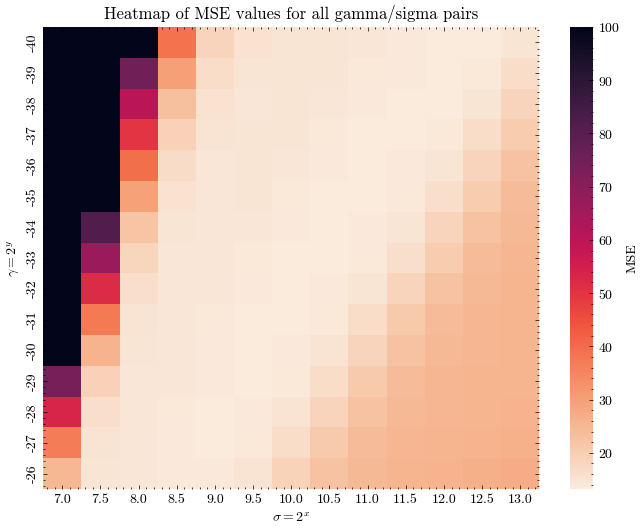

In [60]:
# plot mse vs sigma and gamma as a heatmap   
plt.figure(figsize=(8,6))
fig = sns.heatmap(
    mse_matrix, xticklabels=sigma_power, yticklabels=gamma_power.astype(int), 
    vmax=100, cmap=sns.cm.rocket_r, cbar_kws={'label': 'MSE'}
)
plt.title("Heatmap of MSE values for all gamma/sigma pairs")
plt.xlabel(r"$\sigma = 2^x$")
plt.ylabel(r"$\gamma = 2^y$")
plt.savefig("assets/q5b_mse_heatmap.png")
plt.show(fig)

### 5c.

In [61]:
# build optimal kernel using train data and best sigma
k_train = gaussian_kernel_matrix(X_train, X_train, best_sigma)

In [62]:
# create optimal alpha vector using above optimal kernel and best gamma                     
alpha = calculate_alpha(k_train, y_train, best_gamma)

In [63]:
# calculate predictions and mse of the train data using created alpha vector
train_pred_krr = eval_krr(alpha, X_train, X_train, gaussian_kernel_matrix, best_sigma) 
mse_train_krr = np.average((y_train-train_pred_krr)**2)
display(Markdown(f'$\sigma_{{best}} = 2^{{{np.log2(best_sigma):.1f}}}$ and\
                $\gamma_{{best}} = 2^{{{np.log2(best_gamma):.0f}}} \Longrightarrow MSE_{{train}}\
                = {mse_train_krr}$'))

$\sigma_{best} = 2^{10.0}$ and                $\gamma_{best} = 2^{-32} \Longrightarrow MSE_{train}                = 8.308513000986634$

In [64]:
# repeat above for test data
test_pred_krr = eval_krr(alpha, X_train, X_test, gaussian_kernel_matrix, best_sigma)  
mse_test_krr = np.average((y_test-test_pred_krr)**2) 
display(Markdown(f'$\sigma_{{best}} = 2^{{{np.log2(best_sigma):.1f}}}$ and\
                $\gamma_{{best}} = 2^{{{np.log2(best_gamma):.0f}}} \Longrightarrow MSE_{{test}}\
                = {mse_test_krr}$'))

$\sigma_{best} = 2^{10.0}$ and                $\gamma_{best} = 2^{-32} \Longrightarrow MSE_{test}                = 13.010202013850929$

### 5d.

In [65]:
results_dict = {}

In [66]:
runs = 20

# initialise empty lists to store mse results
mse_total_train_const = []
mse_total_test_const = []
    
# initialise empty lists to store results of mse from 20 repeats
mse_total_train_col = np.zeros([runs,12])
mse_total_test_col = np.zeros([runs,12])

# initialise empty lists to store mse results for regression on all attributes
mse_total_train_full = []
mse_total_test_full = []

# initliase empty mse lists to store results of krr
mse_total_train_krr = []
mse_total_test_krr = []

# iniitialise empty lists to store best gamma/sigma pair for each run of krr
best_simga_list = []
best_gamma_list =[]

# perform 20 runs of naive regression utilising an array of ones for the input data
for i in tqdm(range(runs)):
    
    # generate train and test data; different random sample each run
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3) 

    # NAIVE LR IMPLEMENTATION
    mse_train_const, mse_test_const = naive_reg(X_train, X_test, y_train, y_test)
    
    # calculate naive linear regression mse for train and test data and append to lists
    mse_total_train_const.append(mse_train_const)
    mse_total_test_const.append(mse_test_const)
    
    # LR SINGLE ATTRIBUTE IMPLEMENTATION
    # repeat linear regression isolating each attribute (plus the bias term)   
    for col in range(1,13): 
    
        mse_train_col, mse_test_col = single_att_reg(X_train, X_test, y_train, y_test, col)
         
        # calculate single attribute linear regression mse for train and test data and append to lists
        mse_total_train_col[i,col-1] = mse_train_col
        mse_total_test_col[i,col-1] = mse_test_col
    
    # LR ALL ATTRIBUTES IMPLEMENTATION
    mse_train_full, mse_test_full = full_reg(X_train, X_test, y_train, y_test)
    
    # calculate full linear regression mse for train and test data and append to lists
    mse_total_train_full.append(mse_train_full)
    mse_total_test_full.append(mse_test_full)
    
    # KRR IMPLEMENTATION
    # initliase best gamma/sigma and minimum error trackers
    best_gamma = 0
    best_sigma = 0
    min_error = np.infty

    # determine fold size for 5 fold cross validation
    l = len(X_train)
    fold_size = l//k

    # loop through all values of gamma and sigma and fit kernel ridge regression
    # use the same train and test samples for each combination of parameters
    for g, gamma in enumerate(gamma_list):
        for s, sigma in enumerate(sigma_list):

            mean_mse_cv = krr_cv(X_train, X_test, y_train, y_test, gamma, sigma)

            # if mse is lower than current lowest error, update sigma, gamma and minimum error
            if mean_mse_cv < min_error:
                best_gamma = gamma
                best_sigma = sigma
                min_error = mean_mse_cv
    
    # append best gamma/sigma of run to lists
    best_simga_list.append(best_sigma)
    best_gamma_list.append(best_gamma)            
    
    # generate best kernel and alpha vector of run
    run_best_kernel = gaussian_kernel_matrix(X_train, X_train, best_sigma)
    run_best_alpha = calculate_alpha(run_best_kernel, y_train, best_gamma)

    # caluclate predictions using optimal alpha found in the run and calculate mse
    train_pred = eval_krr(run_best_alpha, X_train, X_train, gaussian_kernel_matrix, best_sigma) 
    mse_total_train_krr.append(np.average((y_train-train_pred)**2))

    # repeat above for test data
    test_pred = eval_krr(run_best_alpha, X_train, X_test, gaussian_kernel_matrix, best_sigma)  
    mse_total_test_krr.append(np.average((y_test-test_pred)**2))

  0%|          | 0/20 [00:00<?, ?it/s]

In [67]:
# calculate average mse and std for naive regression
mse_train_const_avg = np.average(mse_total_train_const).round(2)
mse_train_const_sd = np.std(mse_total_train_const).round(2)
mse_test_const_avg = np.average(mse_total_test_const).round(2)
mse_test_const_sd = np.std(mse_total_test_const).round(2)

# store results of naive regression in the results dictionary
results_dict["Naive Regression"] = {
    'Train': str(mse_train_const_avg)+"+/-"+str(mse_train_const_sd),
    'Test': str(mse_test_const_avg)+"+/-"+str(mse_test_const_sd)
} 

In [68]:
# calculate average mse and std for single attribute (plus bias) regression       
mse_train_col_avg = np.average(mse_total_train_col, axis=0).round(2)
mse_train_col_sd = np.std(mse_total_train_col, axis=0).round(2)
mse_test_col_avg = np.average(mse_total_test_col, axis=0).round(2)
mse_test_col_sd = np.std(mse_total_test_col, axis=0).round(2)

# store results for each attribute in the results dictionary
for i in range(12):
    results_dict[f"Linear Regression (Attribute {i+1})"] = {
        'Train': str(mse_train_col_avg[i])+"+/-"+str(mse_train_col_sd[i]), 
        'Test': str(mse_test_col_avg[i])+"+/-"+str(mse_test_col_sd[i])
    }

In [69]:
# calculate average mse and standard deviation for full (plus bias) regression  
mse_train_full_avg = np.average(mse_total_train_full).round(2)
mse_train_full_sd = np.std(mse_total_train_full).round(2)
mse_test_full_avg = np.average(mse_total_test_full).round(2)
mse_test_full_sd = np.std(mse_total_test_full).round(2) 

# store results of linear regression using all attributes in the results dictionary
results_dict["Linear Regression (All Attributes)"] = {
    'Train': str(mse_train_full_avg)+"+/-"+str(mse_train_full_sd),
    'Test': str(mse_test_full_avg)+"+/-"+str(mse_test_full_sd)
}

In [70]:
# calculate the average mse and corresponding standard deviation               
mse_train_krr_avg = np.average(mse_total_train_krr).round(2)
mse_train_krr_sd = np.std(mse_total_train_krr).round(2)
mse_test_krr_avg = np.average(mse_total_test_krr).round(2)
mse_test_krr_sd = np.std(mse_total_test_krr).round(2)

# add results of kernel ridge regression to results dict  
results_dict["Kernel Ridge Regression"] = {
    'Train': str(mse_train_krr_avg)+"+/-"+str(mse_train_krr_sd),
    'Test': str(mse_test_krr_avg)+"+/-"+str(mse_test_krr_sd)
} 

In [71]:
results_df = pd.DataFrame.from_dict(results_dict).T

In [72]:
results_df

,Train,Test
Naive Regression,102.84+/-28.69,102.16+/-28.77
Linear Regression (Attribute 1),71.54+/-4.02,73.82+/-8.77
Linear Regression (Attribute 2),78.82+/-8.5,80.14+/-14.73
Linear Regression (Attribute 3),69.23+/-6.46,65.77+/-8.96
Linear Regression (Attribute 4),92.85+/-13.12,93.26+/-16.36
Linear Regression (Attribute 5),72.85+/-6.44,73.42+/-11.98
Linear Regression (Attribute 6),44.49+/-3.32,42.85+/-6.65
Linear Regression (Attribute 7),73.37+/-4.94,72.48+/-10.02
Linear Regression (Attribute 8),80.24+/-5.24,80.35+/-9.25
Linear Regression (Attribute 9),90.37+/-28.94,88.26+/-28.88
